# Study of a genetic switch model as a dynamical system

This exercise was generated from a Jupyter notebook. You can download the notebook [here](phase_portrait_in_class.ipynb).

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
rc = {'lines.linewidth' : 3, 'axes.labelsize' : 13, 'xtick.labelsize' : 13, \
      'ytick.labelsize' : 13, 'axes.titlesize' : 16}
sns.set(rc = rc)

Dynamical equations

\begin{align}
\frac{\mathrm{d} R_1}{\mathrm{d} t} &= -\gamma R_1 + \frac{r}{1 + (R_2 / K)^2}, \\
\frac{\mathrm{d} R_2}{\mathrm{d} t} &= -\gamma R_2 + \frac{r}{1 + (R_1 / K)^2}.
\end{align}

Steady state equations

\begin{align}
R_1^{\text{steady}} &= \frac{r/\gamma}{1 + (R_2 / K)^2}, \\
R_2^{\text{steady}} &= \frac{r/\gamma}{1 + (R_1 / K)^2)}.
\end{align}

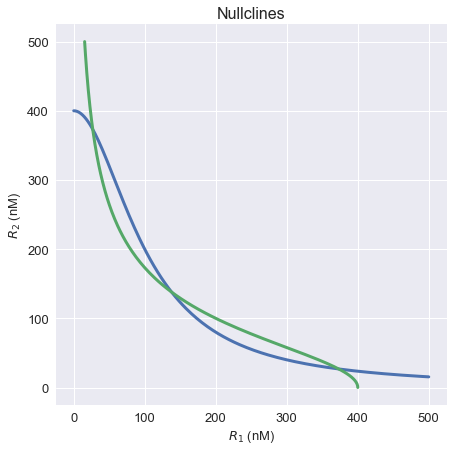

In [21]:
# Define the model parameters
r = 40 # Production rate in sec^-1
gamma = 0.1 # Degradation rate in sec^-1
K = 100 # Dissociation constant in nM

R_max = 500 # in M units
n_points= 200

# Range of values for plotting
R1_range = np.linspace(0, R_max, n_points)
R2_range = np.linspace(0, R_max, n_points)

# Steady state values
R1_steady = (r/gamma) / (1 + (R2_range/K)**2)
R2_steady = (r/gamma) / (1 + (R1_range/K)**2)

# Plot the nullclines
plt.figure(figsize = [7,7])
plt.plot(R1_range, R2_steady)
plt.plot(R1_steady, R2_range)
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Nullclines')

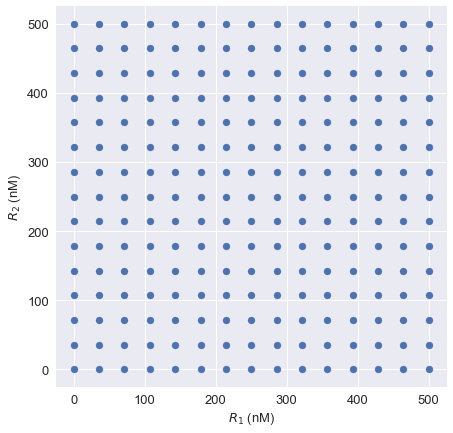

In [26]:
# Number of divisions per axis
n_divisions = 15

# List of coordinates for the vector plot
R1_vec_ls = np.linspace(0, R_max, n_divisions)
R2_vec_ls = np.linspace(0, R_max, n_divisions)

# Find all points on the grid
R1_mesh, R2_mesh = np.meshgrid(R1_vec_ls, R2_vec_ls)

# Show the poits where the vector field is going to be evaluated
plt.figure(figsize = [7,7])
plt.scatter(R1_mesh, R2_mesh)
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')

Dynamical equations

\begin{align}
\frac{\mathrm{d} R_1}{\mathrm{d} t} &= -\gamma R_1 + \frac{r}{1 + (R_2 / K)^2}, \\
\frac{\mathrm{d} R_2}{\mathrm{d} t} &= -\gamma R_2 + \frac{r}{1 + (R_1 / K)^2}.
\end{align}

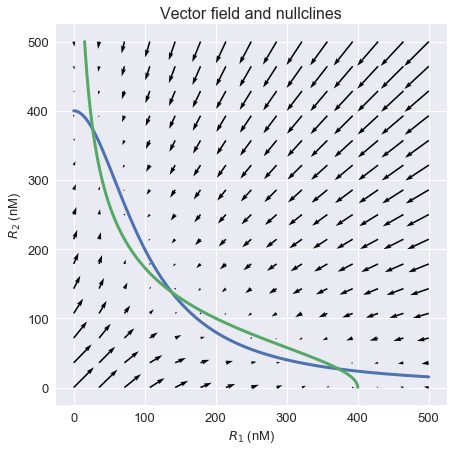

In [30]:
# Evaluate the derivatives at meshgrid points
dR1dt = -gamma * R1_mesh + r / (1 + (R2_mesh/K)**2)
dR2dt = -gamma * R2_mesh + r / (1 + (R1_mesh/K)**2)

plt.figure(figsize=[7,7])
plt.plot(R1_range, R2_steady) # Nullcline 1
plt.plot(R1_steady, R2_range) # Nullcline 2
plt.quiver(R1_mesh, R2_mesh, dR1dt, dR2dt) # Vector field
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Vector field and nullclines')

Dynamical equations

\begin{align}
\frac{\mathrm{d} R_1}{\mathrm{d} t} &= -\gamma R_1 + \frac{r}{1 + (R_2 / K)^2}, \\
\frac{\mathrm{d} R_2}{\mathrm{d} t} &= -\gamma R_2 + \frac{r}{1 + (R_1 / K)^2}.
\end{align}

In [45]:
# Show the plot in a new window
%matplotlib

plt.figure(figsize=[7,7])
plt.plot(R1_range, R2_steady, label = 'dR2/dt = 0') # Nullcline 1
plt.plot(R1_steady, R2_range, label = 'dR1/dt = 0') # Nullcline 2
plt.legend()
plt.quiver(R1_mesh, R2_mesh, dR1dt, dR2dt, alpha = 0.2) # Add a transparent vector field
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Convergence behavior of the system')

# List of initial values
R1 = np.array([50, 500, 100, 200, 500, 10, 0,   0])
R2 = np.array([50, 500, 500,   0, 200, 0, 10, 300])

# Time step in sec
dt = 0.5

# Number of steps
n_steps = 300

for i in range(n_steps):
    
    # Increments for R1 and R2
    dR1 = (-gamma*R1 + r/(1 + (R2/K)**2)) * dt 
    dR2 = (-gamma*R2 + r/(1 + (R1/K)**2)) * dt
    
    # Update the R1 and R2 values
    R1 = R1 + dR1
    R2 = R2 + dR2
    
    # Plot the new position
    plt.scatter(R1, R2, color = 'black', s = 10)
    
    # Ask Python to pause at each step
    plt.pause(0.005)

Using matplotlib backend: MacOSX


In [43]:
# Show the plot in a new window
%matplotlib

plt.figure(figsize=[7,7])
plt.xlabel('Time (s)')
plt.ylabel('Concentration (nM)')

# List of initial values in nM
R1 = 200
R2 = 50

# Time step in sec
dt = 0.5

# Number of steps
n_steps = 300

for i in range(n_steps):
    
    # Increments for R1 and R2
    dR1 = (-gamma*R1 + r/(1 + (R2/K)**2)) * dt 
    dR2 = (-gamma*R2 + r/(1 + (R1/K)**2)) * dt
    
    # Update the R1 and R2 values
    R1 = R1 + dR1
    R2 = R2 + dR2
    
    # Plot the new positions
    plt.scatter(dt*(i+1), R1, color = 'r', s = 10, label = '$R_1$')
    plt.scatter(dt*(i+1), R2, color = 'black', s = 10, label = '$R_2$')
    
    plt.xlim([0, n_steps*dt])
    plt.ylim([0, R_max])
    
    # Ask Python to pause at each step
    plt.pause(0.005)

Using matplotlib backend: MacOSX
